In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [3]:
#config
m = 5
n = 5
beta = 0.9
t = 1.0
alpha = 0.45
err = 0.001

In [43]:
def init(m,n):
    A = np.random.rand(m,n)*0.1
    x = np.zeros((n,1))
    return A,x
    

In [5]:
def optimization_goal(A,x):
    assert (np.abs(x) < np.ones((n,1))).all()
    assert (np.dot(A,x)<np.ones(m)).all()
    res = -np.sum([np.log(1-np.dot(A[i,:],x)) for i in range(A.shape[0])]) - np.sum([np.log(1-x[i]**2) for i in range(A.shape[1])])
    return res

In [6]:
def get_grad(A,x):
    grad = np.zeros(x.shape)
    for i in range(A.shape[0]):
        grad += np.resize( A[i,:],x.shape)/(1-np.dot(np.resize(A[i,:],x.shape).T,x))
    grad += 2*x/(1-x*x)            
    return grad

In [7]:
def bls(A, x, t, alpha, beta):
    f_x_0 = optimization_goal(A,x)
    f_x = f_x_0
    jacobian_x = get_grad(A,x)
    jacobian_x_norm = LA.norm(jacobian_x)
    while f_x > f_x_0 - alpha * t * jacobian_x_norm**2:
        t = beta * t
        f_x = optimization_goal(A,x-t*jacobian_x)
    return t

In [11]:
def solver(A,x,t,alpha,beta,err):
    step_traj = []
    step_traj.append(t)
    obj_traj =[]
    obj_res = optimization_goal(A,x)
    obj_traj.append(obj_res)
    jacobian_x = get_grad(A,x)
    while LA.norm(jacobian_x) > err:
        t_bls = bls(A,x,t,alpha,beta)
        x = x - t_bls*jacobian_x
        obj_res = optimization_goal(A,x)
        jacobian_x = get_grad(A,x)
        step_traj.append(t_bls)
        obj_traj.append(obj_res)
    return step_traj, obj_traj    

In [44]:
m=12
n=10
A,x = init(m,n)

In [53]:
alpha = 0.45
beta=0.1
step_traj,obj_traj = solver(A,x,1.0,alpha,beta,err)

Text(0.5, 0.98, 'm=12,n=10,beta=0.1,alpha=0.45')

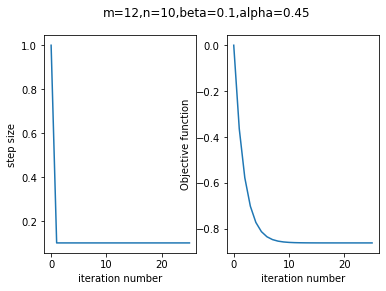

In [54]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(range(len(step_traj)),step_traj)
axs[0].set_xlabel('iteration number')
axs[0].set_ylabel('step size')

axs[1].plot(range(len(step_traj)),obj_traj)
axs[1].set_xlabel('iteration number')
axs[1].set_ylabel('Objective function')
fig.suptitle(f'm={m},n={n},beta={beta},alpha={alpha}')